## Lab Sea MLD

This notebook compare the simulated mixed layer depth in Labrador Sea between high-res and low-res simulations.

In [1]:
import os
import matplotlib.gridspec as gridspec
from mpasanalysis import *
import e3sm_res_cmp
%matplotlib inline

In [2]:
def plot_mld_ice(mpaso_mld, mpascice_icearea, label=None, axis=None):
    levels = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                   110, 130, 150, 180, 210, 240, 280, 320, 360,
                   407, 454, 500, 1000, 1500, 2000])
    if axis is None:
        axis = plt.gca()
    m, fig = mpaso_mld.plot(region='LabSea', ptype='contourf', axis=axis,
                       levels=levels, title=label,
                       add_colorbar=False)
    mpascice_icearea.overlay(m, axis=axis, levels=[0.15, 0.85], cmap='bone_r')
    robj = region_latlon('LabSea_SD1')
    m.drawgreatcircle(robj.lon_ll, robj.lat_ll, robj.lon_ll, robj.lat_ur, color='gray')
    m.drawgreatcircle(robj.lon_ll, robj.lat_ur, robj.lon_ur, robj.lat_ur, color='gray')
    m.drawgreatcircle(robj.lon_ur, robj.lat_ur, robj.lon_ur, robj.lat_ll, color='gray')
    m.drawgreatcircle(robj.lon_ur, robj.lat_ll, robj.lon_ll, robj.lat_ll, color='gray')
    return m, fig

### March MLD

Plotting map of MLD (density threshold) (m) at region 'LabSea'


/Users/qingli/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'tri'
  s)


Plotting map of MLD (density threshold) (m) at region 'LabSea'


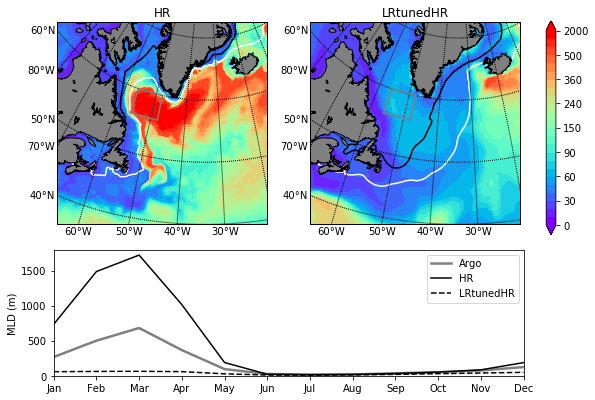

In [3]:

# paths
fig_root = os.environ['HOME']+'/work/e3sm_res_cmp/figures'
path_mld_hr = fig_root+'/high_res/0026-0055/data_map_LabSea_climo_03_dThreshMLD.npz'
path_ice_hr = fig_root+'/high_res/0026-0055/data_map_LabSea_climo_03_iceArea.npz'
path_ts_hr  = fig_root+'/high_res/0026-0055/data_ts_LabSea_SD1_avg_dThreshMLD.npz'
path_mld_lr = fig_root+'/low-res-cmp/0021-0050/data_map_LabSea_climo_03_dThreshMLD.npz'
path_ice_lr = fig_root+'/low-res-cmp/0021-0050/data_map_LabSea_climo_03_iceArea.npz'
path_ts_lr  = fig_root+'/low-res-cmp/0021-0050/data_ts_LabSea_SD1_avg_dThreshMLD.npz'
obs_root = os.environ['HOME']+'/data/obs'
path_ts_obs = obs_root+'/MLD/data_ts_LabSea_SD1_avg_MLD_Argo.npz'

# plot figure
fig = plt.figure(figsize=[9,6.5])
gs = gridspec.GridSpec(5, 6)
gs.update(right=0.85, wspace=0.75, hspace=0.5)
ax1 = plt.subplot(gs[0:3, :3] )
ax2 = plt.subplot(gs[0:3, 3:])
ax3 = plt.subplot(gs[3:, 0:])
# plt.show()

mpaso_mld_hr = MPASOMap().load(path_mld_hr)
mpascice_icearea_hr = MPASCICEMap().load(path_ice_hr)
mpaso_mld_lr = MPASOMap().load(path_mld_lr)
mpascice_icearea_lr = MPASCICEMap().load(path_ice_lr)

m, im0 = plot_mld_ice(mpaso_mld_hr, mpascice_icearea_hr, label='HR', axis=ax1)
plot_mld_ice(mpaso_mld_lr, mpascice_icearea_lr, label='LRtunedHR', axis=ax2)

mon_mld_hr = np.load(path_ts_hr)
mon_mld_lr = np.load(path_ts_lr)
mon_mld_obs = np.load(path_ts_obs)
mld_hr = mon_mld_hr['mld']
mld_lr = mon_mld_lr['mld']
mld_obs = mon_mld_obs['mld']
time = np.linspace(1,12,12)
mon_xticks = [calendar.month_abbr[i+1] for i in np.arange(12)]
ax3.plot(time, mld_obs, '-', color='gray', linewidth=2.5, label='Argo')
ax3.plot(time, mld_hr, '-k', linewidth=1.5, label='HR')
ax3.plot(time, mld_lr, '--k', linewidth=1.5, label='LRtunedHR')
plt.setp(ax3, xticks=time, xticklabels=mon_xticks)
ax3.set_xlim([1,12])
ax3.set_ylim([0,1800])
ax3.plot(time, np.zeros(time.size), '-k', linewidth=0.5)
ax3.set_ylabel('MLD (m)')
ax3.legend(loc=1)

cax0 = plt.axes([0.80, 0.41, 0.1, 0.49])
cax0.set_visible(False)
cb0 = plt.colorbar(im0, ax=cax0)
# cb0.formatter.set_powerlimits((-2, 3))
cb0.update_ticks()

# save figure
figname = fig_root+'/LabSea_climo_03_dThreshMLD_ice_all.png'
fig.savefig(figname, dpi = 300)
# plt.close(fig)